In [9]:
import pandas_datareader as pdr
import pandas as pd

In [6]:
key='3a152b7c6bf8f136551af559c5555fc340f4b8a8'

In [7]:
df=pdr.get_data_tiingo('AAPL',api_key=key)

c:\python\python39\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [8]:
df.to_csv('AAPL.csv')

In [11]:
df=pd.read_csv('AAPL.csv')

In [12]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-10-17 00:00:00+00:00,117.55,117.84,116.78,117.33,23624896,27.555810,27.623791,27.375309,27.504238,94499584,0.0,1.0
1,AAPL,2016-10-18 00:00:00+00:00,117.47,118.21,117.45,118.18,24553478,27.537057,27.710526,27.532368,27.703493,98213912,0.0,1.0
2,AAPL,2016-10-19 00:00:00+00:00,117.12,117.76,113.80,117.25,20034594,27.455011,27.605038,26.676744,27.485485,80138376,0.0,1.0
3,AAPL,2016-10-20 00:00:00+00:00,117.06,117.38,116.33,116.86,24125801,27.440945,27.515959,27.269821,27.394062,96503204,0.0,1.0
4,AAPL,2016-10-21 00:00:00+00:00,116.60,116.91,116.28,116.81,23192665,27.333113,27.405783,27.258100,27.382341,92770660,0.0,1.0


In [13]:
df2=df.reset_index()['close']

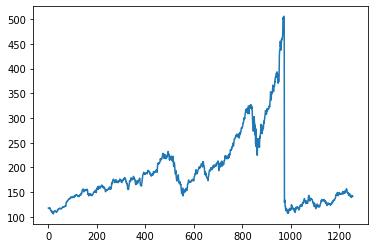

In [14]:
import matplotlib.pyplot as plt
plt.plot(df2)

In [15]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df2).reshape(-1,1))

In [16]:
df1.shape

(1257, 1)

In [17]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
len(train_data),len(test_data)

(817, 440)

In [20]:
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)    

In [21]:
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [23]:
print(X_train.shape),print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [24]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [30]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=100,verbose=1)

Epoch 1/100
8/8 [==============================] - 10s 226ms/step - loss: 0.0152 - val_loss: 0.0276
Epoch 2/100
8/8 [==============================] - 0s 32ms/step - loss: 0.0036 - val_loss: 0.0267
Epoch 3/100
8/8 [==============================] - 0s 30ms/step - loss: 0.0020 - val_loss: 0.0237
Epoch 4/100
8/8 [==============================] - 0s 29ms/step - loss: 0.0013 - val_loss: 0.0209
Epoch 5/100
8/8 [==============================] - 0s 27ms/step - loss: 8.7427e-04 - val_loss: 0.0228
Epoch 6/100
8/8 [==============================] - 0s 28ms/step - loss: 6.3160e-04 - val_loss: 0.0229
Epoch 7/100
8/8 [==============================] - 0s 28ms/step - loss: 5.4481e-04 - val_loss: 0.0252
Epoch 8/100
8/8 [==============================] - 0s 27ms/step - loss: 5.3058e-04 - val_loss: 0.0250
Epoch 9/100
8/8 [==============================] - 0s 26ms/step - loss: 5.0346e-04 - val_loss: 0.0230
Epoch 10/100
8/8 [==============================] - 0s 26ms/step - loss: 4.9402e-04 - val_loss: 

Epoch 81/100
8/8 [==============================] - 0s 27ms/step - loss: 1.9010e-04 - val_loss: 0.0175
Epoch 82/100
8/8 [==============================] - 0s 27ms/step - loss: 2.0668e-04 - val_loss: 0.0168
Epoch 83/100
8/8 [==============================] - 0s 28ms/step - loss: 2.0214e-04 - val_loss: 0.0145
Epoch 84/100
8/8 [==============================] - 0s 27ms/step - loss: 1.8478e-04 - val_loss: 0.0133
Epoch 85/100
8/8 [==============================] - 0s 27ms/step - loss: 2.0462e-04 - val_loss: 0.0136
Epoch 86/100
8/8 [==============================] - 0s 27ms/step - loss: 1.7997e-04 - val_loss: 0.0150
Epoch 87/100
8/8 [==============================] - 0s 27ms/step - loss: 1.8697e-04 - val_loss: 0.0147
Epoch 88/100
8/8 [==============================] - 0s 28ms/step - loss: 1.8053e-04 - val_loss: 0.0127
Epoch 89/100
8/8 [==============================] - 0s 27ms/step - loss: 1.9740e-04 - val_loss: 0.0139
Epoch 90/100
8/8 [==============================] - 0s 28ms/step - loss: 

In [33]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [34]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [36]:
import math
from sklearn.metrics import mean_squared_error

In [38]:
math.sqrt(mean_squared_error(y_train,train_predict))

189.17394475618255

In [39]:
math.sqrt(mean_squared_error(y_test,test_predict))

223.27338107333787